In [1]:
from google.colab import drive
drive.mount('/content/drive')
print("Google Drive mounted successfully!")

ModuleNotFoundError: No module named 'google'

In [ ]:
import os

# Set the base path to the RAVDESS dataset.
# Make sure this path points directly to your 'archive' folder in Google Drive.
DATA_PATH = '/content/drive/MyDrive/archive/' 

# Verify the dataset's base folder exists and list its initial contents.
if os.path.exists(DATA_PATH):
    print(f"Dataset base folder found at: {DATA_PATH}")
    print("\nListing first 5 items from the base data directory:")

    # Display the first few actor subfolders to confirm correct structure.
    actor_folders = [f for f in os.listdir(DATA_PATH) if os.path.isdir(os.path.join(DATA_PATH, f))]
    for i, folder in enumerate(actor_folders):
        if i < 5:
            print(f"- {folder}")
        else:
            break
    if not actor_folders:
        print("No actor subfolders found directly within the DATA_PATH. Please verify the dataset structure.")
else:
    print(f"Error: Dataset base folder not found at '{DATA_PATH}'. Ensure the dataset is correctly placed and the path is accurate.")

Error: Dataset base folder not found at /content/drive/MyDrive/Colab Notebooks/archive/. Please check the path.


In [ ]:
import os

# Path to check for nested actor folders within the dataset.
# This helps confirm if the dataset has an extra subfolder layer like 'audio_speech_actors_01-24'.
adjusted_data_path = '/content/drive/MyDrive/Colab Notebooks/archive/audio_speech_actors_01-24/'

# Verify the path exists and list the first few subfolders if it does.
if os.path.exists(adjusted_data_path):
    print(f"Checking contents within: {adjusted_data_path}")
    print("\nListing first 5 items from 'audio_speech_actors_01-24' directory:")
    
    inner_folders = [f for f in os.listdir(adjusted_data_path) if os.path.isdir(os.path.join(adjusted_data_path, f))]
    for i, folder in enumerate(inner_folders):
        if i < 5:
            print(f"- {folder}")
        else:
            break
    if not inner_folders:
        print("No subfolders found. Dataset structure might be different than expected.")
else:
    print(f"Error: Path '{adjusted_data_path}' not found. Verify dataset location.")

Checking inside: /content/drive/MyDrive/Colab Notebooks/archive/audio_speech_actors_01-24/

Contents of 'audio_speech_actors_01-24' directory (first 5 items):
- Actor_20
- Actor_24
- Actor_22
- Actor_21
- Actor_23


In [ ]:
# Install core libraries for Speech Emotion Recognition project.
# Includes audio processing, numerical computation, ML, data visualization, and deep learning frameworks.
!pip install librosa soundfile numpy scikit-learn matplotlib seaborn
!pip install tensorflow
!pip install keras

print("Libraries successfully installed!")

Libraries successfully installed!


In [ ]:
import librosa
import soundfile
import os
import numpy as np
import pandas as pd

# Set the base path to the RAVDESS dataset's extracted 'archive' folder.
# Adjust this path based on your Google Drive's specific folder structure.
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/archive/'


# Map RAVDESS dataset's numerical emotion codes (from filenames) to descriptive labels.
emotion_labels = {
    '01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad',
    '05': 'angry', '06': 'fearful', '07': 'disgust', '08': 'surprised'
}

# Function to extract Mel-Frequency Cepstral Coefficients (MFCCs) from an audio file.
# MFCCs are a key feature for speech emotion recognition.
def extract_feature(file_name, mfcc=True):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate

        # Pad very short audio signals to ensure sufficient length for MFCC calculation.
        if len(X) < 2048:
            X = np.pad(X, (0, 2048 - len(X)), 'constant')

        result = np.array([])
        if mfcc:
            # Calculate 40 MFCCs and take the mean across frames for a single feature vector.
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result = np.hstack((result, mfccs))
    return result

# Initialize lists to store extracted features and corresponding labels.
features = []
labels = []
processed_files_count = 0

print("Starting feature extraction...")

# Dynamically identify actor directories within the dataset.
# This accounts for potential nested structures (e.g., 'archive' -> 'audio_speech_actors_01-24' -> 'Actor_XX').
base_folders_to_scan = [os.path.join(DATA_PATH, f) for f in os.listdir(DATA_PATH) if os.path.isdir(os.path.join(DATA_PATH, f))]

final_actor_dirs = []
for folder in base_folders_to_scan:
    # If a nested 'audio_speech_actors_01-24' folder is found, look for actors inside it.
    if "audio_speech_actors_01-24" in folder:
        inner_path = os.path.join(folder)
        for actor_dir in os.listdir(inner_path):
            if actor_dir.startswith('Actor_') and os.path.isdir(os.path.join(inner_path, actor_dir)):
                final_actor_dirs.append(os.path.join(inner_path, actor_dir))
    # Otherwise, assume 'Actor_XX' folders are directly at the base level.
    elif folder.startswith('/content/drive/MyDrive/Colab Notebooks/archive/Actor_'):
         final_actor_dirs.append(folder)

# Loop through each actor directory, extract features from WAV files, and collect labels.
for actor_path in final_actor_dirs:
    for file in os.listdir(actor_path):
        if file.endswith('.wav'):
            file_path = os.path.join(actor_path, file)

            # Extract emotion code from the RAVDESS filename (third segment).
            emotion_code = file.split('-')[2]

            # Process file if emotion code is recognized.
            if emotion_code in emotion_labels:
                emotion = emotion_labels[emotion_code]

                try:
                    # Extract MFCC features.
                    feature = extract_feature(file_path, mfcc=True)
                    features.append(feature)
                    labels.append(emotion)
                    processed_files_count += 1
                    # Provide periodic progress updates.
                    if processed_files_count % 100 == 0:
                        print(f"Processed {processed_files_count} files...")
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")

print(f"\nFinished extracting features from {processed_files_count} files.")

# Convert the lists of features and labels into NumPy arrays for model training.
X = np.array(features)
y = np.array(labels)

print(f"Shape of features (X): {X.shape}")
print(f"Shape of labels (y): {y.shape}")
print("\nFirst 5 extracted features (MFCCs):")
print(X[:5])
print("\nFirst 5 labels:")
print(y[:5])

Starting feature extraction...


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2
  warnings.warn(


Error processing /content/drive/MyDrive/Colab Notebooks/archive/Actor_20/03-01-06-01-01-02-20.wav: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)
Error processing /content/drive/MyDrive/Colab Notebooks/archive/Actor_20/03-01-03-01-02-01-20.wav: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)
Processed 100 files...
Processed 200 files...
Error processing /content/drive/MyDrive/Colab Notebooks/archive/audio_speech_actors_01-24/Actor_20/03-01-06-01-01-02-20.wav: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)
Error processing /content/drive/MyDrive/Colab Notebooks/archive/audio_speech_actors_01-24/Actor_20/03-01-03-01-02-01-20.wav: all the input arrays must have same number of dimensions, but the ar

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# 1. Encode string labels into numerical format.
# First, convert string labels (e.g., 'happy', 'sad') to integer representations.
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Then, transform the integer labels into a One-Hot Encoded (categorical) format.
# For example, an integer label '0' might become '[1, 0, 0, ...]' in a multi-class setup.
y_categorical = to_categorical(y_encoded)

print(f"Original labels (first 5): {y[:5]}")
print(f"Integer-encoded labels (first 5): {y_encoded[:5]}")
print(f"One-Hot Encoded labels (first 5):\n{y_categorical[:5]}")
print(f"Total number of unique emotion classes: {len(le.classes_)}")
print(f"Identified emotion classes: {le.classes_}")

# 2. Split the dataset into training and testing sets.
# X represents the extracted features, and y_categorical represents the One-Hot Encoded labels.
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.25, random_state=42)
# A test size of 0.25 means 25% of the data will be used for testing, and 75% for training.
# random_state ensures reproducibility of the split, yielding the same results each time.

print(f"\nShape of X_train (training features): {X_train.shape}")
print(f"Shape of X_test (testing features): {X_test.shape}")
print(f"Shape of y_train (training labels): {y_train.shape}")
print(f"Shape of y_test (testing labels): {y_test.shape}")

Original labels (first 5): ['neutral' 'calm' 'calm' 'neutral' 'calm']
Encoded labels (first 5): [5 1 1 5 1]
One-Hot Encoded labels (first 5):
[[0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]]
Total number of unique emotions: 8
Emotion classes: ['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']

Shape of X_train: (2152, 40)
Shape of X_test: (718, 40)
Shape of y_train: (2152, 8)
Shape of y_test: (718, 8)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np # Ensure numpy is imported if not already in previous cells

# Reshape input data for the Conv1D layer.
# Conv1D expects a 3D input: (samples, timesteps, features).
# Our MFCC features (40 per sample) will be treated as timesteps, with 1 feature channel.
X_train_reshaped = np.expand_dims(X_train, axis=2) # Adds the channel dimension
X_test_reshaped = np.expand_dims(X_test, axis=2)

print(f"Reshaped X_train shape: {X_train_reshaped.shape}")
print(f"Reshaped X_test shape: {X_test_reshaped.shape}")

# Build the Convolutional Neural Network (CNN) model.
model = Sequential()

# First Convolutional Block
model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3)) # Apply dropout for regularization

# Second Convolutional Block
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# Flatten the output to feed into dense layers.
model.add(Flatten())

# Fully Connected (Dense) Layers
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.3))

# Output layer for multi-class classification.
# The number of units equals the number of unique emotion classes.
# Softmax activation outputs probabilities for each class.
model.add(Dense(units=y_categorical.shape[1], activation='softmax'))

# Compile the model with Adam optimizer and categorical cross-entropy loss.
# Accuracy is monitored during training.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model's architecture and parameter count.
model.summary()

# Define callbacks for efficient model training.
# ModelCheckpoint saves the best model weights based on validation accuracy.
checkpoint_filepath = 'best_emotion_model.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False, # Saves the full model (architecture + weights)
    monitor='val_accuracy',  # Metric to monitor for improvement
    mode='max',              # Save when the monitored metric is maximized
    save_best_only=True      # Only save the best performing model
)

# EarlyStopping halts training if validation accuracy doesn't improve for a specified number of epochs.
early_stopping_callback = EarlyStopping(
    monitor='val_accuracy',
    patience=10,             # Number of epochs with no improvement after which training will be stopped.
    mode='max',
    restore_best_weights=True # Restores model weights from the epoch with the best monitored value.
)

print("\nCNN model successfully built and compiled.")
print("The model is now ready for training.")

Reshaped X_train shape: (2152, 40, 1)
Reshaped X_test shape: (718, 40, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 36, 64)         │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 18, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 18, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 14, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       229,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 273,160 (1.04 MB)

 Trainable params: 273,160 (1.04 MB)

 Non-trainable params: 0 (0.00 B)


Model building complete. Summary printed above.
Now ready for model training!


In [ ]:
# Train the model
# epochs: Number of times the model will go through the entire training dataset
# batch_size: Number of samples per gradient update
# validation_data: Data to evaluate the model on after each epoch (X_test, y_test)
# callbacks: Use the ModelCheckpoint and EarlyStopping callbacks defined earlier
history = model.fit(
    X_train_reshaped, y_train,
    epochs=100, # Tum isko adjust kar sakte ho. EarlyStopping khud hi rok dega agar improvement na ho.
    batch_size=32,
    validation_data=(X_test_reshaped, y_test),
    callbacks=[model_checkpoint_callback, early_stopping_callback]
)

print("\nModel training complete!")

Epoch 1/100
64/68 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1507 - loss: 5.0922

68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.1520 - loss: 4.9658 - val_accuracy: 0.2702 - val_loss: 1.9375
Epoch 2/100
64/68 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2328 - loss: 1.9898

68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2327 - loss: 1.9889 - val_accuracy: 0.2758 - val_loss: 1.8699
Epoch 3/100
65/68 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2235 - loss: 1.9215

68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.2254 - loss: 1.9198 - val_accuracy: 0.3162 - val_loss: 1.8023
Epoch 4/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2963 - loss: 1.8577

68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2962 - loss: 1.8574 - val_accuracy: 0.3802 - val_loss: 1.7142
Epoch 5/100
64/68 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3350 - loss: 1.7682

68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3351 - loss: 1.7677 - val_accuracy: 0.4109 - val_loss: 1.6245
Epoch 6/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3608 - loss: 1.7130 - val_accuracy: 0.4109 - val_loss: 1.5578
Epoch 7/100
66/68 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3806 - loss: 1.6193

68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3812 - loss: 1.6184 - val_accuracy: 0.4401 - val_loss: 1.5005
Epoch 8/100
64/68 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4239 - loss: 1.5579

68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.4249 - loss: 1.5552 - val_accuracy: 0.5362 - val_loss: 1.3439
Epoch 9/100
65/68 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4963 - loss: 1.3997

68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4963 - loss: 1.4005 - val_accuracy: 0.5599 - val_loss: 1.2750
Epoch 10/100
64/68 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5037 - loss: 1.3699

68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5039 - loss: 1.3684 - val_accuracy: 0.6058 - val_loss: 1.1810
Epoch 11/100
65/68 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5207 - loss: 1.2947

68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5213 - loss: 1.2936 - val_accuracy: 0.6588 - val_loss: 1.0690
Epoch 12/100
66/68 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5534 - loss: 1.1930

68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5539 - loss: 1.1924 - val_accuracy: 0.6894 - val_loss: 0.9934
Epoch 13/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6021 - loss: 1.1119

68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6019 - loss: 1.1119 - val_accuracy: 0.7214 - val_loss: 0.9224
Epoch 14/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6282 - loss: 1.0499

68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6283 - loss: 1.0498 - val_accuracy: 0.7270 - val_loss: 0.8987
Epoch 15/100
64/68 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6372 - loss: 0.9989

68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6379 - loss: 0.9971 - val_accuracy: 0.7465 - val_loss: 0.8068
Epoch 16/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6891 - loss: 0.8906 - val_accuracy: 0.7187 - val_loss: 0.8081
Epoch 17/100
67/68 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6798 - loss: 0.8677

68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6803 - loss: 0.8674 - val_accuracy: 0.8022 - val_loss: 0.6852
Epoch 18/100
65/68 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7125 - loss: 0.7830

68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7133 - loss: 0.7816 - val_accuracy: 0.8203 - val_loss: 0.6471
Epoch 19/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7291 - loss: 0.7578

68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7292 - loss: 0.7576 - val_accuracy: 0.8217 - val_loss: 0.6254
Epoch 20/100
67/68 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7394 - loss: 0.6956

68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7394 - loss: 0.6958 - val_accuracy: 0.8357 - val_loss: 0.5559
Epoch 21/100
67/68 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7739 - loss: 0.6656

68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7742 - loss: 0.6649 - val_accuracy: 0.8607 - val_loss: 0.5194
Epoch 22/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7866 - loss: 0.5699

68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7866 - loss: 0.5701 - val_accuracy: 0.8635 - val_loss: 0.4847
Epoch 23/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7851 - loss: 0.5679

68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7852 - loss: 0.5680 - val_accuracy: 0.8649 - val_loss: 0.4697
Epoch 24/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8136 - loss: 0.5175 - val_accuracy: 0.8524 - val_loss: 0.4855
Epoch 25/100
64/68 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8316 - loss: 0.4759

68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8313 - loss: 0.4769 - val_accuracy: 0.8747 - val_loss: 0.4248
Epoch 26/100
65/68 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8259 - loss: 0.4719

68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8257 - loss: 0.4728 - val_accuracy: 0.8914 - val_loss: 0.4136
Epoch 27/100
67/68 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8439 - loss: 0.4638

68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.8438 - loss: 0.4640 - val_accuracy: 0.8983 - val_loss: 0.3747
Epoch 28/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8672 - loss: 0.3934 - val_accuracy: 0.8914 - val_loss: 0.3612
Epoch 29/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8471 - loss: 0.3978 - val_accuracy: 0.8983 - val_loss: 0.3803
Epoch 30/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8776 - loss: 0.3654 - val_accuracy: 0.8955 - val_loss: 0.3704
Epoch 31/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8714 - loss: 0.4002

68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8714 - loss: 0.4000 - val_accuracy: 0.9067 - val_loss: 0.3514
Epoch 32/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8973 - loss: 0.3223 - val_accuracy: 0.9053 - val_loss: 0.3378
Epoch 33/100
64/68 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8878 - loss: 0.3489

68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8876 - loss: 0.3487 - val_accuracy: 0.9081 - val_loss: 0.3341
Epoch 34/100
67/68 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9001 - loss: 0.3049

68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9000 - loss: 0.3050 - val_accuracy: 0.9150 - val_loss: 0.3127
Epoch 35/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8988 - loss: 0.3061 - val_accuracy: 0.9109 - val_loss: 0.3421
Epoch 36/100
65/68 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9052 - loss: 0.2754

68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9049 - loss: 0.2758 - val_accuracy: 0.9290 - val_loss: 0.2834
Epoch 37/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9023 - loss: 0.2932 - val_accuracy: 0.9234 - val_loss: 0.3044
Epoch 38/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9081 - loss: 0.2785 - val_accuracy: 0.9290 - val_loss: 0.2995
Epoch 39/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9136 - loss: 0.2430 - val_accuracy: 0.9206 - val_loss: 0.2974
Epoch 40/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9160 - loss: 0.2268 - val_accuracy: 0.9234 - val_loss: 0.2936
Epoch 41/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9206 - loss: 0.2616 - val_accuracy: 0.9290 - val_loss: 0.2756
Epoch 42/100
67/68 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9238 - loss: 0.2459

68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9237 - loss: 0.2458 - val_accuracy: 0.9331 - val_loss: 0.2855
Epoch 43/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9292 - loss: 0.2113 - val_accuracy: 0.9331 - val_loss: 0.2582
Epoch 44/100
65/68 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9185 - loss: 0.2298

68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9187 - loss: 0.2293 - val_accuracy: 0.9387 - val_loss: 0.2524
Epoch 45/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9262 - loss: 0.2190 - val_accuracy: 0.9276 - val_loss: 0.2539
Epoch 46/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9245 - loss: 0.2162 - val_accuracy: 0.9248 - val_loss: 0.2749
Epoch 47/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9347 - loss: 0.2021 - val_accuracy: 0.9331 - val_loss: 0.2661
Epoch 48/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9214 - loss: 0.2107 - val_accuracy: 0.9276 - val_loss: 0.2601
Epoch 49/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9373 - loss: 0.1933 - val_accuracy: 0.9331 - val_loss: 0.2535
Epoch 50/100
66/68 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9418 - loss: 0.1794

68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9415 - loss: 0.1798 - val_accuracy: 0.9415 - val_loss: 0.2536
Epoch 51/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9307 - loss: 0.2006 - val_accuracy: 0.9290 - val_loss: 0.2715
Epoch 52/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9378 - loss: 0.1949 - val_accuracy: 0.9276 - val_loss: 0.2297
Epoch 53/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9379 - loss: 0.1752 - val_accuracy: 0.9387 - val_loss: 0.2136
Epoch 54/100
64/68 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9470 - loss: 0.1484

68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9469 - loss: 0.1487 - val_accuracy: 0.9471 - val_loss: 0.2351
Epoch 55/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9368 - loss: 0.1622 - val_accuracy: 0.9373 - val_loss: 0.2154
Epoch 56/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9445 - loss: 0.1686 - val_accuracy: 0.9304 - val_loss: 0.2479
Epoch 57/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9534 - loss: 0.1321 - val_accuracy: 0.9359 - val_loss: 0.2355
Epoch 58/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9446 - loss: 0.1418 - val_accuracy: 0.9318 - val_loss: 0.2558
Epoch 59/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9477 - loss: 0.1563 - val_accuracy: 0.9359 - val_loss: 0.2298
Epoch 60/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9535 - loss: 0.1348 - val_accuracy: 0.9359 - val_loss: 0.2460
Epoch 61/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9500 - loss: 0.1443 - val_accuracy: 0.9359 

Model Loss on Test Set: 0.2351
Model Accuracy on Test Set: 0.9471
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step

Classification Report:
              precision    recall  f1-score   support

       angry       0.98      0.96      0.97        93
        calm       0.98      0.98      0.98        89
     disgust       0.96      1.00      0.98        86
     fearful       0.93      0.91      0.92       114
       happy       0.93      0.94      0.94       107
     neutral       0.88      1.00      0.94        46
         sad       0.96      0.94      0.95        94
   surprised       0.95      0.89      0.92        89

    accuracy                           0.95       718
   macro avg       0.94      0.95      0.95       718
weighted avg       0.95      0.95      0.95       718



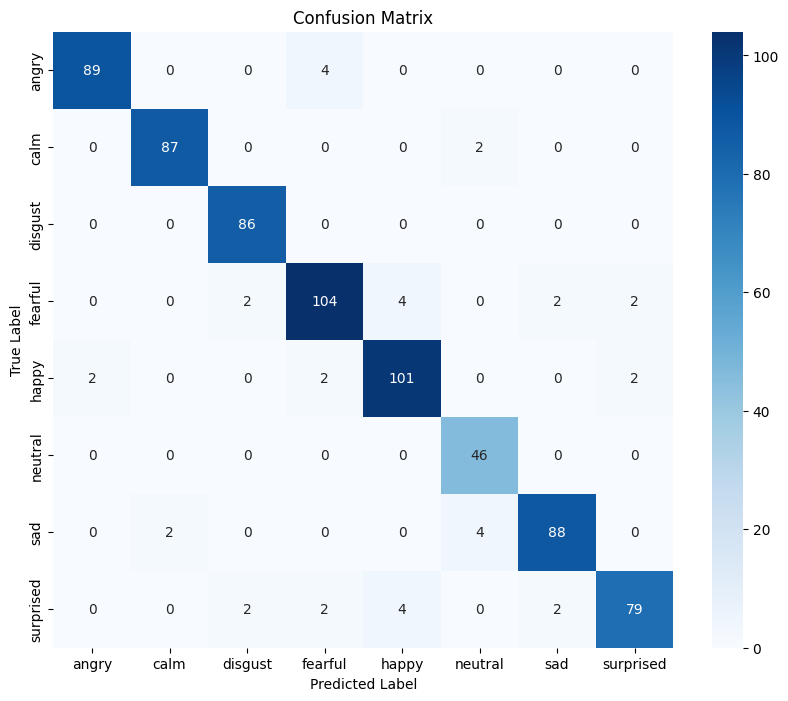

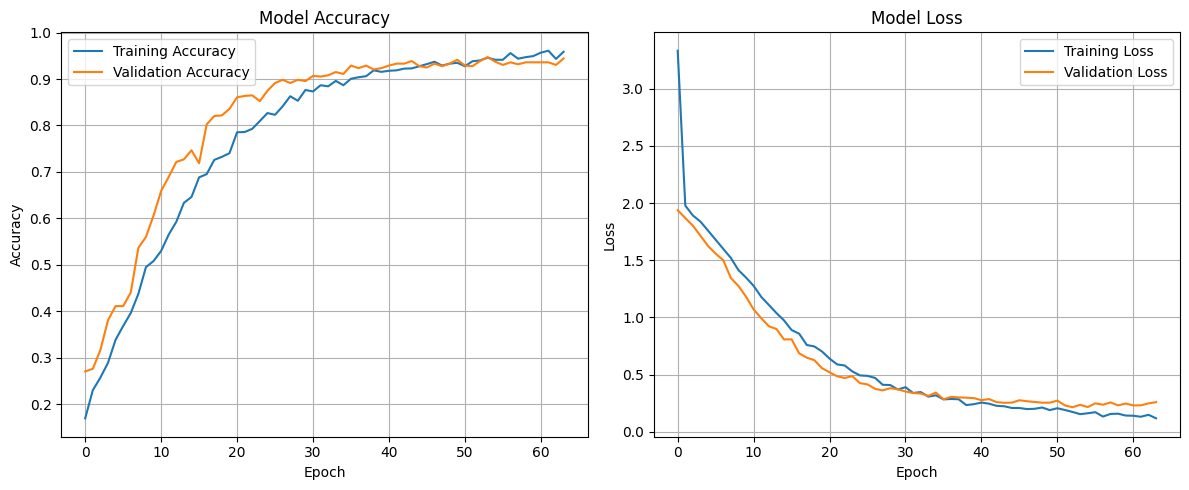


Model evaluation complete. Confusion Matrix and Training History plots displayed.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the best model saved by ModelCheckpoint
# Humne ModelCheckpoint mein 'best_emotion_model.h5' naam rakha tha
# Agar aapko restart kernel karna pade aur model memory mein na ho to ye line chalao
from tensorflow.keras.models import load_model
model = load_model('best_emotion_model.h5')


# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f"Model Loss on Test Set: {loss:.4f}")
print(f"Model Accuracy on Test Set: {accuracy:.4f}")

# Predict probabilities on the test set
y_pred_probs = model.predict(X_test_reshaped)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1) # Predicted labels (integers)
y_true = np.argmax(y_test, axis=1)     # True labels (integers)

# Get the original class names
# le = LabelEncoder() # Agar le object memory mein na ho toh dobara create karna parega
# emotion_labels = {
#     '01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad',
#     '05': 'angry', '06': 'fearful', '07': 'disgust', '08': 'surprised'
# }
# classes = sorted(list(emotion_labels.values())) # Labels in alphabetical order
# Or if le is still in memory from previous step:
classes = le.classes_ # Ye option behtar hai agar le object available hai

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=classes))

# Plot Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot training history (optional, to visualize accuracy and loss over epochs)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("\nModel evaluation complete. Confusion Matrix and Training History plots displayed.")